<center>
<img src="https://i.ibb.co/Ycs11Fg/meme.jpg">
</center>

# Андан на экономе: домашнее задание 3
## Задача классификации

**ФИО: Золотухина Евгения Олеговна**


## Общая информация


__Дата выдачи:__ 14.04.2023

__Мягкий дедлайн:__ 23:59MSK 07.05.2023

__Жесткий дедлайн:__ 23:59MSK 14.05.2023

## Оценивание и штрафы

Каждая из задач имеет определенную «стоимость» (указана в скобках около задачи). Максимально допустимая оценка за работу — 100 баллов. За каждый день просрочки после мягкого дедлайна снимается 10 баллов. После жёсткого дедлайна работы не принимаются. Даже при опозданиии на одну секунду. Сдавайте работы заранее.

Мягкий дедлайн можно отодвинуть без потери баллов на 1,2 или 3 дня. Суммарно для откладывания в запасе есть три дня. Можно отодвинуть один дедлайн на три дня, а можно три дедлайна подвинуть на один день. Распоряжаться этими днями студент может как угодно. Жёсткий дедлайн, при этом, не меняется. Если такое произошло, нужно сообщить о сдвиге при сдаче работы.

Задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов. Если вы нашли решение какого-то из заданий (или его часть) в открытом источнике, необходимо указать ссылку на этот источник (скорее всего вы будете не единственным, кто это нашел, поэтому чтобы исключить подозрение в плагиате, необходима ссылка на источник).

Любой из студентов может быть вызван на защиту любого домашнего задания. В таком случае итоговая оценка студента определяется в результате защиты.

> За отсутствие названий графиков и подписей к осям могут снижаться баллы. Все картинки должны быть самодостаточны и визуально удобны для восприятия, так чтобы не нужно было смотреть ваш код или знать задание, чтобы понять что на них изображено. 

> Выводы должны быть релевантными. Не забывайте их писать. Если в вопросе требуется ответ словами, а его нет, вы будете терять довольно много баллов.

> Фиксируйте все seed'ы, random_state'ы и тд - ваш код должен быть воспроизводим с теми же результатами.

## Формат сдачи

Сам ноутбук называйте в формате hw-03-USERNAME.ipynb, где USERNAME — ваши фамилия и имя. Файл сдаётся в anytask.

## Импорт необходимых библиотек 

Импортируйте все используемые библиотеки здесь.

In [2]:
# Ваш код здесь


# Отключение некоторых лишних предупреждений
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import fbeta_score
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier

## Задача 

В данном задании вам необходимо построить предсказательную модель, определяющую пол клиента по его банковским транзакциям.

Вам доступны 2 файла:
* __transaction.csv__ - файл с транзакциями, колонки:
    * user_id - целочисленный идентификатор пользователя
    * dt - дата и время совершения транзации, принцип кодирования: "DAY TIME"
        * DAY - порядковый день транзации с начала сбора данных
        * TIME - время в формате hh:mm:ss
    * type - тип (категория) совершаемой транзакции
    * value - сумма транзакции
    
* __gender.csv__ - файл с данными о полах клиентов.
    * user_id - целочисленный идентификатор пользователя
    * gender - целевая переменная, закодированная лейблами 0 и 1. Это сделано:
        * a) для удобства
        * б) для избежания холиваров о правильности исходных меток 

Но если вы вдруг захотите похоливарить о том, что метки только две - то заметьте, что о полноте данных мы тоже не утверждаем.

# Часть 1: минималочка [макс 20 баллов]

В этой части мы с вами попробуем построить самую простую модель для предсказания.

Как мы с вами увидим: главная сложность - правильная подготовка данных. В таких задачах то, как именно вы преобразуете данные для обучения модели и будет во много определять её качество.

В этой части мы сделаем простое преобразование данных путём простой агрегации данных о величине транзакций. 

## Загрузка данных [5 баллов] 

Скачайте данные для задачи с Яндекс.Диска:
https://disk.yandex.ru/d/DGy6bbLaMZmrQg.

Загрузите файлы с транзакциями и целевой меткой в pd.DataFrame.

__Внимание__: у файла transactions.csv колоночный разделитель - точка с запятой ";"

In [3]:
df = pd.read_csv("transactions.csv", delimiter = ";")
df

,user_id,dt,type,value
0,39026145,0 10:23:26,"Звонки с использованием телефонов, считывающих...",2695.099
1,39026145,6 07:08:31,"Звонки с использованием телефонов, считывающих...",2358.212
2,39026145,8 07:06:10,"Звонки с использованием телефонов, считывающих...",2807.395
3,39026145,11 08:49:03,"Звонки с использованием телефонов, считывающих...",2695.099
4,39026145,11 14:12:08,"Звонки с использованием телефонов, считывающих...",2695.099
...,...,...,...,...
2282462,71902723,290 15:12:09,Агенты и менеджеры по аренде недвижимости,2133.620
2282463,71942984,248 00:00:00,Агенты и менеджеры по аренде недвижимости,1870.848
2282464,71942984,375 00:00:00,Агенты и менеджеры по аренде недвижимости,2466.016
2282465,74289663,27 00:00:00,Агентства по аренде автомобилей,1445.831


In [4]:
df_1 = pd.read_csv("gender.csv", delimiter = ",")
df_1

,user_id,gender
0,6740969,1.0
1,36599781,0.0
2,91453656,1.0
3,17431962,1.0
4,72568668,1.0
...,...,...
8395,93715144,1.0
8396,51502229,0.0
8397,77655748,1.0
8398,87819773,1.0


## Подготовка данных [10 баллов] 

Для данной задачи необходимо как-то собрать данные для каждого пользователя в один вектор (строку таблицы). Сейчас, как вы можете увидеть, в таблице с данными одному пользователю может соответствовать много строк (каждая операция - отдельная строка).

Таким образом, необходима агрегация данных - это можно сделать множеством разных способов.

### Агрегация 

Произведите простую агрегацию данных и для каждого пользователя в качестве признаков получите сумму, среднее и стандартное отклонение величины его транзакций. 

Так же добавите для каждого пользователя колонку с таргетом.

По итогу вы должны получить таблицу с колонками:
* user_id
* value_sum
* value_mean
* value_std
* gender

In [5]:
ag_df = df.groupby('user_id')['value'].agg(['sum', 'mean', 'std']).merge(df_1[['user_id', 'gender']], on = 'user_id', how = 'left').rename(columns = {'sum':'value_sum', 'mean':'value_mean', 'std':'value_std'}).dropna()
ag_df

,user_id,value_sum,value_mean,value_std,gender
0,22899,274383.315,2143.619648,656.186785,1.0
1,27914,166436.523,2521.765500,415.972053,1.0
2,28753,251578.185,1980.930591,749.304999,0.0
3,31385,717856.052,2323.158744,632.491585,0.0
4,38084,1360028.958,2095.576206,649.030870,0.0
...,...,...,...,...,...
8351,99953525,159252.786,1608.614000,709.903466,0.0
8352,99967537,13026.313,2605.262600,123.013557,1.0
8353,99988578,1304612.429,2185.280451,638.235664,1.0
8354,99991245,249213.163,2026.123276,739.432221,1.0


### Отложенная выборка 

Получите полный список пользователей и разделите их на два списка:
* тренировочный список пользователей (80%)
* тестовый список пользователей (20%)

__Важное замечание__: Далее во всех пунктах, где вам нужно провалидировать (оценить) получившуюся модель исползуйте данные только для этих тестовых пользователей.

Обучать все модели, естественно, нужно только на данных пользователей из обучающего списка.

In [6]:
df_train, df_test = train_test_split(ag_df.iloc[:, 1:], test_size = 0.2, stratify=ag_df['gender'], random_state = 0)

Для нашей задачи получите признаки и целевые метки обучающей и тестовой выборки. 

In [7]:
y_train = df_train['gender']
y_test = df_test['gender'] 
X_train = df_train.drop('gender', axis=1)
X_test = df_test.drop('gender', axis=1)

## Обучение и оценка модели [5 баллов] 

Обучите модель логистической регрессии с дефолтными параметрами.

Получите предсказания вероятностей первого класса.

In [8]:
model = LogisticRegression().fit(X_train, y_train)

In [9]:
p_pred = model.predict_proba(X_test)

*Вероятности первого класса:*

In [10]:
p_pred[:, -1]

array([0.42007195, 0.48467049, 0.48172703, ..., 0.49686772, 0.43870256,
       0.48200209])

In [11]:
y_pred = model.predict(X_test)

### Валидация 

Посчитайте ROC_AUC, accuracy, precision, recall для получившихся предсказаний.

Для метрик, для которых необходимы метки классов, а не вероятности - используйте порог 0.5.

Далее при оценки других моделей приводите эти же метрики (если явно не указано иное).

In [12]:
prob = p_pred[:, -1]
auc = roc_auc_score(y_test, prob)
print('ROC_AUC = ', auc)

ROC_AUC =  0.5596239199016501


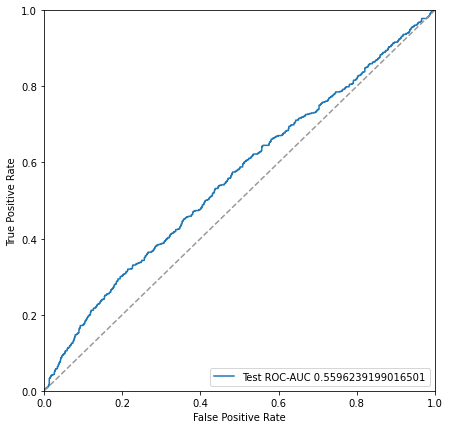

In [13]:
fpr_test, tpr_test, thresholds_test = roc_curve(y_test, prob)

plt.figure(figsize=(7, 7))
plt.plot(fpr_test, tpr_test, label='Test ROC-AUC {0}'.format(auc))
plt.plot([0, 1], [0, 1], '--', color=(0.6, 0.6, 0.6))
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right');

In [14]:
print('Accuracy = ', accuracy_score(y_pred, y_test))

Accuracy =  0.5577617328519856


In [15]:
print('Precision = ', precision_score(y_test, y_pred))

Precision =  0.6


In [16]:
print('Recall = ',recall_score(y_test, y_pred))

Recall =  0.024291497975708502


### Вывод

Как вы оцениваете качество получившейся модели и возможные причины такого качества?

__Ваш вывод:__

ROC AUC = 0.55, это говорит о плохом качестве модели, то есть модель логистической регрессии плохо классифицирует данные по классам (фактически классифицирует их случайно). Модель делает прогноз с точностью 55.7%; процент доверия к решению модели, что выборка относится к классу Positive составляет 60%; Recall = 0.02, это значит, что модель корректно определила 2% объектов класса Positive. На качество может влиять 1) малое количество признаков, описывающих каждого клиента, что может повысить вероятность мультиколлинеарности между признаками, а также может влиять большой диапазон значений.Кроме того, если выборка данных слишком маленькая, то модель может не смочь уловить все особенности данных. 2) Мы не оптимизировали наши данные (плохо подготовили). 3) Некорректная настройка параметров модели логстической регрессии, что мешает корректно определять классы.

# Часть 2: мб сделаем что-то более серьёзное? [макс 20 баллов]

Давайте попробуем улучшить качество решения задачи за счёт другого метода подготовки данных.

Ранее мы использовали простое преобразование, когда каждый клиент описывался только 3 значениями.
Давайте сделаем что-то более сложное и попробуем добавить больше данных о клиенте для модели.

## Подготовка данных [15 баллов]

Воспользуемся тем, что каждая транзакция у нас имеет свой тип - это уж точно более информативно, чем агрегация по всем транзакциям.

Создайте сводную таблицу, где для каждого клиента (строка) будут указаны его суммарные траты на каждую категорию (столбец). Таким образом, вы должны получить таблицу с числом строк равным количеству клиентов и числом столбцов - количеству категорий трат. Каждая ячейка должна содержать суммарные траты данного клиента в данной категории.

__Подсказка__: у DataFrame есть полезный метод `pivot_table`.

In [17]:
new_df = pd.pivot_table(df, index = ['user_id'], columns=['type'], values='value', aggfunc='sum', fill_value=0).merge(df_1[['user_id', 'gender']], on = 'user_id', how = 'left')
new_df

,user_id,"Авиалинии, авиакомпании","Авиалинии, авиакомпании, нигде более не классифицированные",Автобусные линии,Автозапчасти и аксессуары,Автоматизированные бензозаправки,Автомойки,Автошины,"Агентства по автотранспортным перевозкам, местные/дальные автогрузоперевозки, компании попереезду и хранению, местная доставка",Агентства по аренде автомобилей,...,"Химикалии и смежные вещества, не классифицированные ранее",Химчистки,Ценные бумаги: брокеры/дилеры,Центры здоровья,"Цифровые товары, игры",Школы — бизнес и секретарей,Штрафы,"Штучные товары, галантерея и другие текстильные товары",Электрические части и оборудование,gender
0,22899,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,1.0
1,27914,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,1.0
2,28753,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0
3,31385,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0
4,38084,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8351,99953525,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0
8352,99967537,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,1.0
8353,99988578,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,4267.24,0.0,0.0,0.0,0.0,1.0
8354,99991245,0.0,0.0,0.0,4446.915,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,1.0


## Обучение и валидация модели [5 баллов]

Аналогично предыдущей части разделите данные на обучающую и тестовую выборку (80%/20%), обучите модель на дефолтных параметрах и оцените качество.

In [18]:
trainy, testy = train_test_split(new_df.iloc[:, 1:], test_size = 0.2, stratify=new_df['gender'], random_state = 0)
y_tr = trainy['gender']
y_te = testy['gender'] 
X_tr = trainy.drop('gender', axis=1)
X_te = testy.drop('gender', axis=1)
model_1 = LogisticRegression().fit(X_tr, y_tr)
p_pre = model_1.predict_proba(X_te)

In [19]:
p_pre[:, -1]

array([0.70321697, 0.98910699, 0.60655303, ..., 0.46187969, 0.69886766,
       0.46408131])

In [20]:
y_pre = model_1.predict(X_te)

In [21]:
probability = p_pre[:, -1]
auc_1 = roc_auc_score(y_te, probability)
print('ROC_AUC = ', auc_1)

ROC_AUC =  0.8027145495920649


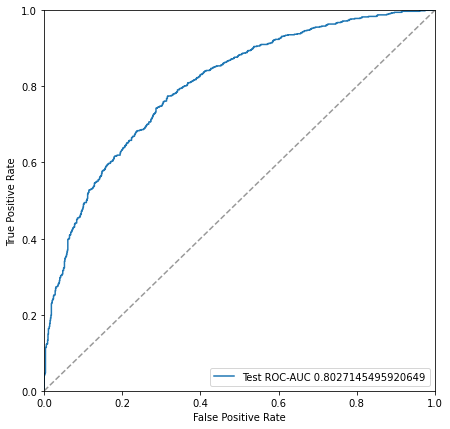

In [22]:
fpr, tpr, thresholds = roc_curve(y_te, probability)

plt.figure(figsize=(7, 7))
plt.plot(fpr, tpr, label='Test ROC-AUC {0}'.format(auc_1))
plt.plot([0, 1], [0, 1], '--', color=(0.6, 0.6, 0.6))
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right');

In [23]:
print('Accuracy = ', accuracy_score(y_pre, y_te))

Accuracy =  0.7260765550239234


In [24]:
print('Precision = ', precision_score(y_te, y_pre))

Precision =  0.7195121951219512


In [25]:
print('Recall = ', recall_score(y_te, y_pre))

Recall =  0.6327077747989276


### Вывод 

Изменилось ли качество модели? Почему?

__Ваш вывод:__
Да, качество модели сильно изменилось и при том в лучшую сторону. Это произошло за счёт увеличения числа признаков. При увеличении количества признаков модель логистической регрессии имеет больше информации о данных. Также новые признаки могут увеличить дискриминирующую способность модели, т.е. способность разделять классы объектов. Влияние также может оказывать уменьшения диапозона значений, что могло снизить корреляцию между признаками.

# Часть 3: что мы всё про данные? Давайте про модель 
# [макс 30 баллов]

Ранее мы работали только над подготовкой обучающей выборки. Давайте теперь попробуем изменить модель, чтобы добиться наилучшего качества. 

Входные данные для этой части - выборка с предыдущей.

## Нормирование данных [5 баллов] 

Как мы знаем, линейные модели любят нормированные данные.

Приведите значения всех признаков в отрезок [0, 1]

__Замечание__: если вы используете метод, который удаляет информацию о названиях колонок - сохраните эти названия в отдельную переменную, вам это потом может понадобиться.

In [26]:
names_of_columns = trainy.columns.tolist()

scaler = MinMaxScaler()
X_train_2 = scaler.fit_transform(X_tr)
X_test_2 = scaler.fit_transform(X_te)
y_train_2 = y_tr
y_test_2 = y_te

## Подбор параметров [15 баллов]

Подберите наилучшие параметры для модели линейной регрессии. Важные уточнения:

* используйте перебор по сетке
* в качестве метрики используйте ROC AUC
* для оценки параметров делайте кросс-валидацию на 4 фолдах

__Замечание__: у линейной регрессии множество доступных значений для некоторых параметров зависит от метода оптимизации (solver). Например, lbfgs-алгоритм не подерживает l1-регуляризацию.

Поэтому действуйте шагами: сначала подберите solver, а потом уже переберите доступные для него параметры.

In [27]:
list_of_solvers = ['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga']
params = dict(solver=list_of_solvers)
logreg = LogisticRegression(n_jobs=-1, random_state = 0)
cl = GridSearchCV(logreg, params, cv = 4, scoring='roc_auc')
cl.fit(X_train_2, y_train_2)
print(cl.best_params_)
print(cl.best_score_)

{'solver': 'liblinear'}
0.7803307731323817


In [28]:
scores = cl.cv_results_['mean_test_score']

for score, solver, in zip(scores, list_of_solvers):
    print(f"{solver}: {score: f}")

lbfgs:  0.780318
liblinear:  0.780331
newton-cg:  0.780320
newton-cholesky:  nan
sag:  0.780318
saga:  0.780314


_Источник:_ https://towardsdatascience.com/dont-sweat-the-solver-stuff-aea7cddc3451

In [29]:
lg = LogisticRegression()
param_grid = [    
    {'penalty' : ['l1', 'l2'],
    'C' : np.logspace(-4, 4, 20),
    'solver' : ['liblinear']}
]

clf = GridSearchCV(lg, param_grid = param_grid, cv = 4, verbose=True, n_jobs=-1, scoring='roc_auc')

best_clf = clf.fit(X_train_2, y_train_2)
best_clf.best_estimator_

Fitting 4 folds for each of 40 candidates, totalling 160 fits


LogisticRegression(C=1.623776739188721, penalty='l1', solver='liblinear')

In [30]:
best_lg = LogisticRegression(C=1.623776739188721, penalty='l1', solver='liblinear').fit(X_train_2, y_train_2)

Оцените качество лучшей модели на тестовых данных аналогично предыдущим задачам.

In [31]:
p_pred_2 = best_clf.predict_proba(X_test_2)
proba = p_pred_2[:, -1]
print(proba)
y_pred_2 = best_clf.predict(X_test_2)

[0.14043897 0.39764851 0.82712055 ... 0.44341859 0.78521675 0.39062083]


In [32]:
auc_2 = roc_auc_score(y_test_2, proba)
print('ROC_AUC = ', auc_2)

ROC_AUC =  0.7953042576969178


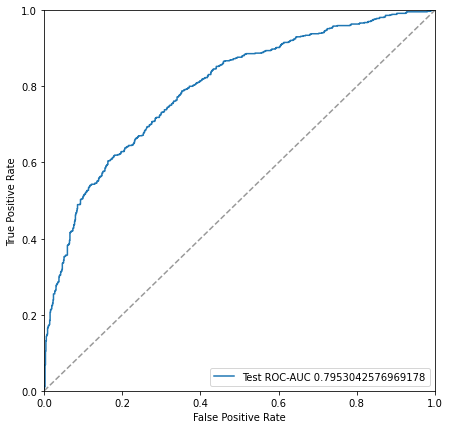

In [33]:
f, t, thr = roc_curve(y_test_2, proba)

plt.figure(figsize=(7, 7))
plt.plot(f, t, label='Test ROC-AUC {0}'.format(auc_2))
plt.plot([0, 1], [0, 1], '--', color=(0.6, 0.6, 0.6))
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right');

In [34]:
print('Accuracy = ', accuracy_score(y_pred_2, y_test_2))

Accuracy =  0.7272727272727273


In [35]:
print('Precision = ', precision_score(y_test_2, y_pred_2))

Precision =  0.7947154471544715


In [36]:
print('Recall = ', recall_score(y_test_2, y_pred_2))

Recall =  0.5241286863270778


Получилось ли добиться лучше качества при подборе параметров?
Почему так? 

Для чего мы использовали одновременно кросс-валидацию и отложенную тестовую выборку?

__Ваш вывод__:
Лучшего качества добиться не удалось, значение ROC AUC снизилось на 0.5%. Возможно лучшего качества не удалось добиться по нескольким причинам: 1) Небалансированные классы, модель может быть склонна к предсказанию более часто встречающегося класса; 2) Некоторые параметры модели не имеют большого влияния на результаты: не все параметры модели могут быть одинаково важны для предсказания результатов; 3) Некоторые признаки оказывают более сильное влияние на вероятность одного из классов.

Сочетание кросс-валидации и отложенной тестовой выборки позволяет получить более точную оценку качества модели и выявить проблемы, связанные с переобучением.(Кросс-валидация используется для оценки качества модели на основе ее поведения на разных наборах данных. Отложенная тестовая выборка используется для финальной проверки модели после завершения ее обучения. Тестовая выборка содержит данные, которые не использовались при обучении модели, что позволяет получить более объективную оценку ее качества. Тестовая выборка также может помочь идентифицировать проблемы, связанные с переобучением, которые могут возникнуть при использовании кросс-валидации.)

## Подбор отсечения [5 баллов]

Ранее мы работали или с вероятностями из модели или с метками, полученных при отсечении по веростности с порогом 0.5.

Стоит сказать, что порог 0.5 для разделения классов не всегда самый лучший. Часто нам нужно так подобрать порог, чтобы удовлетворить наши требования по точности и полноте.

Давайте подберём порог, который максимизирует F_beta меру при условии, что нам полнота в 5 раз важнее точности.

Вычислите наилучший порог и нарисуйте график зависимости этой метрики от порога разделения.

Лучший порог= 0.0


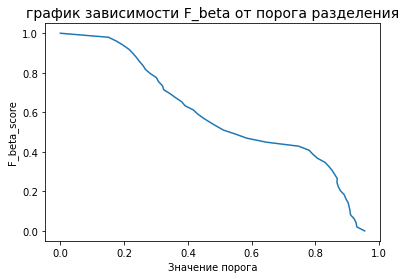

In [37]:
threshold = np.linspace(0,1,50)
betas_list = []
for th in threshold:
    y_preds = 1*(proba >= th)
    beta_scores = fbeta_score(y_test_2, y_preds, beta=5)
    betas_list.append(beta_scores)
plt.plot(betas_list, threshold)
plt.xlabel("Значение порога")
plt.ylabel("F_beta_score")
plt.title('график зависимости F_beta от порога разделения', fontsize= 14);
max_fbeta = max(betas_list) 
max_index = betas_list.index(max_fbeta)
print('Лучший порог=', threshold[max_index])

## Интерпретация модели [5 баллов]

Часто нам хочется интерпритировать предсказания модели - понять, как наши признаки влияют на её ответ.
В случае сложных моделей сделать это не просто - чем сложнее модель, тем более сложные закономерности она извлекает и тем тяжелее нам их понять.

Но в случае линейной регресии это просто сделать, посмотрев на её обучаемые параметры (вспоминайте!).

Получите список признаков, которые увеличивают вероятность метки 0.
Аналогично для метки 1.

In [38]:
importance = best_lg.coef_[0]
max_indices = np.argsort(importance)[::-1][:10]
feature_arr = np.array(names_of_columns)
print('Признаки, увеличивающие вероятность класса 1:')
print(*feature_arr.take(max_indices), sep = '; ')

Признаки, увеличивающие вероятность класса 1:
Автозапчасти и аксессуары; Станции техобслуживания; Телекоммуникационное оборудование, включая продажу телефонов; Кинотеатры; Продажа электронного оборудования; Галереи/учреждения видеоигр; Рестораны, закусочные; Магазины с продажей спиртных напитков на вынос (пиво, вино и ликер); Горючее топливо — уголь, нефть, разжиженный бензин, дрова; Кабельные и другие платные телевизионные услуги


In [39]:
min_indices = np.argsort(importance)[::-1][:-11:-1]
print('Признаки, увеличивающие вероятность класса 0:')
print(*feature_arr.take(min_indices), sep = '; ')

Признаки, увеличивающие вероятность класса 0:
Аптеки; Готовая женская одежда; Магазины косметики; Ткани, обивочный материал, гардины и портьеры, жалюзи; Различные магазины одежды и аксессуаров; Одежда для всей семьи; Аксессуары для женщин; Магазины мужской и женской одежды; Магазины офисных, школьных принадлежностей, канцтоваров; Звонки с использованием телефонов, считывающих магнитную ленту


# Часть 4: ва-банк / пространство для творчества [макс 30 баллов]

Добейтесь максимального качества, больше качество - больше баллов.

Стратегия подготовки данных и обучения модели на ваше усмотрение.

Условия:
* Оценка на отложенной тестовой группе пользователей, использовавшейся в прошлых пунктах (20%)
* В качестве метрики используйте ROC_AUC

__Замечание__: 

Ответа на вопрос "какое нужно качество для максимального балла?" не будет.

Используйте все свои знания, чтобы добиться наилучшего результата.

_Источник:_ https://habr.com/ru/companies/nix/articles/425907/

In [56]:
RF = RandomForestClassifier()
grid = [
    {'n_estimators' : list(range(10,101,10)),
    'max_features' : list(range(6,32,5)),
    'max_depth' : [2, 8, 16]}
]

gs_object = GridSearchCV(RF, param_grid = grid, cv = 4, verbose=True, n_jobs=-1)

best_rf = gs_object.fit(X_train_2, y_train_2)
print(best_rf.best_estimator_)
print(best_rf.best_params_)

Fitting 4 folds for each of 180 candidates, totalling 720 fits
RandomForestClassifier(max_depth=16, max_features=21)
{'max_depth': 16, 'max_features': 21, 'n_estimators': 100}


In [57]:
final_model = RandomForestClassifier(max_depth = 16, max_features = 21, n_estimators = 100).fit(X_train_2, y_train_2)

predictions_new_f = final_model.predict_proba(X_test_2)[:, -1]
auc_f = roc_auc_score(y_test_2, predictions_new_f)
y_pred_f = final_model.predict(X_test_2)
print('ROC_AUC = ', auc_f)
print('Accuracy = ', accuracy_score(y_pred_f, y_test_2))
print('Precision = ', precision_score(y_test_2, y_pred_f))
print('Recall = ', recall_score(y_test_2, y_pred_f))

ROC_AUC =  0.8405998297616084
Accuracy =  0.7607655502392344
Precision =  0.7808441558441559
Recall =  0.6447721179624665


Попробуем использовать градиентный бустинг и подобрать параметры:

In [46]:
gradient_boosted = GradientBoostingRegressor()

grad_model = gradient_boosted.fit(X_train_2, y_train_2)

predictions = grad_model.predict(X_test_2)
auc_3 = roc_auc_score(y_test_2, predictions)
print('ROC_AUC = ', auc_3)

ROC_AUC =  0.8383871649517368


In [50]:
loss = ['ls', 'lad', 'huber']
n_estimators = [100, 500, 900, 1100, 1500]
max_depth = [2, 3, 5, 10, 15]
min_samples_leaf = [1, 2, 4, 6, 8]
min_samples_split = [2, 4, 6, 10]
max_features = ['auto', 'sqrt', 'log2', None]

 
hyperparameter_grid = {'loss': loss,
    'n_estimators': n_estimators,
    'max_depth': max_depth,
    'min_samples_leaf': min_samples_leaf,
    'min_samples_split': min_samples_split,
    'max_features': max_features}

grad_model_2 = GradientBoostingRegressor(random_state = 0)


random_cv = RandomizedSearchCV(estimator=grad_model_2,
    param_distributions=hyperparameter_grid,
    cv=4, n_iter=25, 
    scoring = 'roc_auc',
    n_jobs = -1, verbose = 1, 
    return_train_score = True,
    random_state=4)

best_cv = random_cv.fit(X_train_2, y_train_2) 

print(best_cv.best_estimator_)
print(best_cv.best_params_)

Fitting 4 folds for each of 25 candidates, totalling 100 fits
GradientBoostingRegressor(max_depth=2, max_features='auto', min_samples_leaf=4,
                          min_samples_split=10, n_estimators=500,
                          random_state=0)
{'n_estimators': 500, 'min_samples_split': 10, 'min_samples_leaf': 4, 'max_features': 'auto', 'max_depth': 2, 'loss': 'ls'}


In [55]:
best_gr_b = GradientBoostingRegressor(max_depth=2, max_features='auto', min_samples_leaf=4,
                          min_samples_split=10, n_estimators=500, loss='ls', 
                          random_state=0)
new_grad_model = best_gr_b.fit(X_train_2, y_train_2)

predictions_new = new_grad_model.predict(X_test_2)
auc_4 = roc_auc_score(y_test_2, predictions_new)
print('ROC_AUC = ', auc_4)

ROC_AUC =  0.8402770137638318


__Таким образом,__ значение ROC AUC для Random Forest лучше, чем для градиентного бустинга, хоть и не сильно.